# ML MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from operator import itemgetter
import numpy as np
import pandas as pd

In [ ]:
model_df = pd.read_excel('model_dataframe.xlsx')

In [ ]:
X = model_df.iloc[:, 3:]
y = model_df[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

### Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_params = {"min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"]} 
dt_cv = GridSearchCV(dt_classifier, dt_params, cv = 3, n_jobs = -1, verbose = False)

dt_cv.fit(X_train.values, np.ravel(y_train))

dt_classifier = dt_cv.best_estimator_

### Gradient Boost

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=5)

gb_params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb_classifier, gb_params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))
gb_classifier = gb_cv.best_estimator_

In [ ]:
xgb_classifier = xgb.XGBClassifier()

xgb_params = {"learning_rate": [0.01, 0.1, 0.5],
            "booster": ["gbtree"],
            "objective": ["binary:logistic"],
            "eval_metric": ["error"],
            "eta":[0],
            "gamma":[0],
            "max_depth":[6],
            "min_child_weight":[1],
            "max_delta_step":[0],
            "subsample":[1],
            "colsample_bytree":[1],
            "silent":[1],
            "seed":[0],
            "base_score":[0.5],
            "n_estimators": [50, 100, 200, 250, 300]
         } 

xgb_cv=GridSearchCV(xgb_classifier, xgb_params, cv=2)
xgb_cv.fit(X_train.values, np.ravel(y_train))
xgb_classifier = xgb_cv.best_estimator_
#xgb_cv.predict(test)

### K Nearest Neighbore

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

knn_params = {"leaf_size":[3, 5, 15, 30], "n_neighbors": [20, 5, 15, 35], "weights": ["uniform", "distance"]} 

knn_cv = GridSearchCV(knn_classifier, knn_params, cv = 3, n_jobs = -1, verbose = False)

knn_cv.fit(X_train.values, np.ravel(y_train))

knn_classifier = knn_cv.best_estimator_

### Lohistic Regression

In [ ]:
lr_classifier = LogisticRegression(random_state = 0)

lr_params = {"penalty": ["l2"], "solver": ["lbfgs"]} 

lr_cv = GridSearchCV(lr_classifier, lr_params, n_jobs = -1, verbose = False)

lr_cv.fit(X_train.values, np.ravel(y_train))
lr_classifier = lr_cv.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Random Forest 

In [ ]:
rf_classifier = RandomForestClassifier(random_state=1)

rand_forst_param = {"max_depth": [20, 60], "min_samples_split": [10, 30], "max_leaf_nodes": [175, 50, 100, 200], "min_samples_leaf": [5], "n_estimators": [250, 100, 150, 200], "max_features": ["sqrt"],}

rand_forst_cv = GridSearchCV(rf_classifier, rand_forst_param, cv = 3, n_jobs = -1, verbose = False)
rand_forst_cv.fit(X_train.values, np.ravel(y_train))

rf_classifier = rand_forst_cv.best_estimator_

### Analyze Model

In [ ]:
def analyze(model):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, label="test")

    false_positive_rate_train, true_positive_rate_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(false_positive_rate_train, true_positive_rate_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is {:.2f} on test and {:.2f} on training'.format(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
analyze(dt_classifier)

In [ ]:
analyze(gb_classifier)

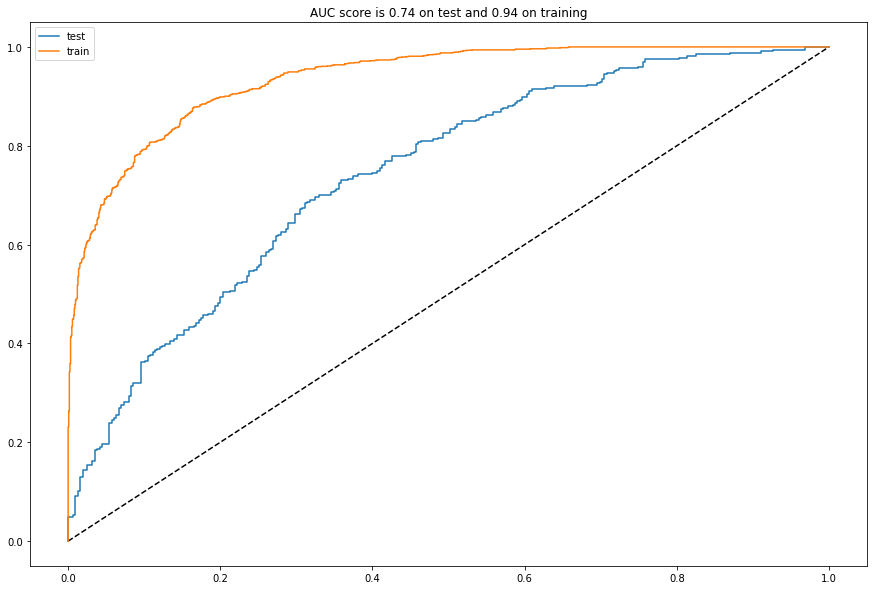

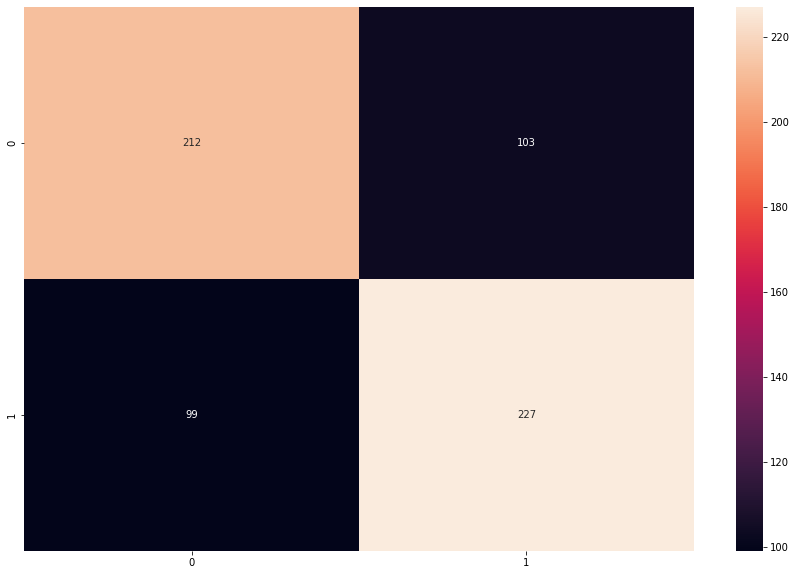

In [ ]:
analyze(xgb_classifier)

In [ ]:
analyze(knn_classifier)

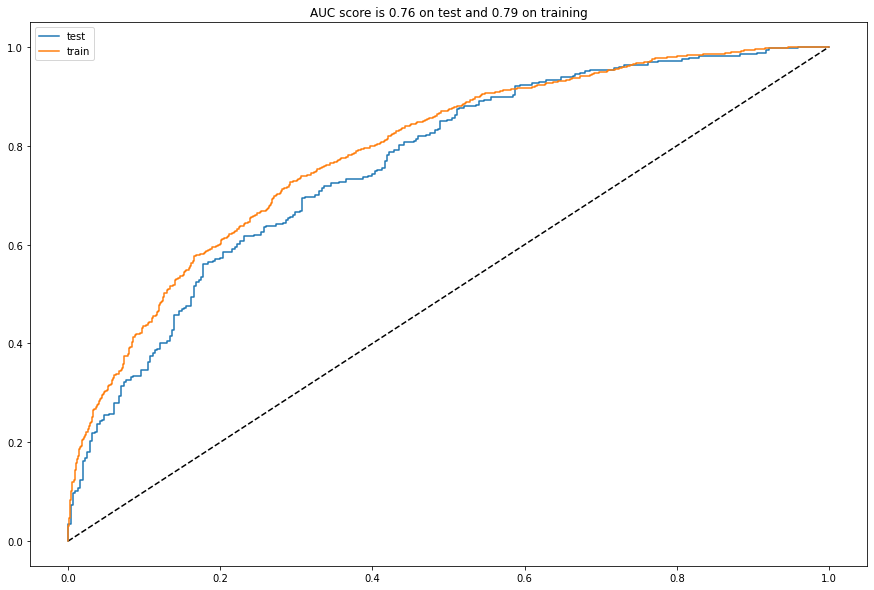

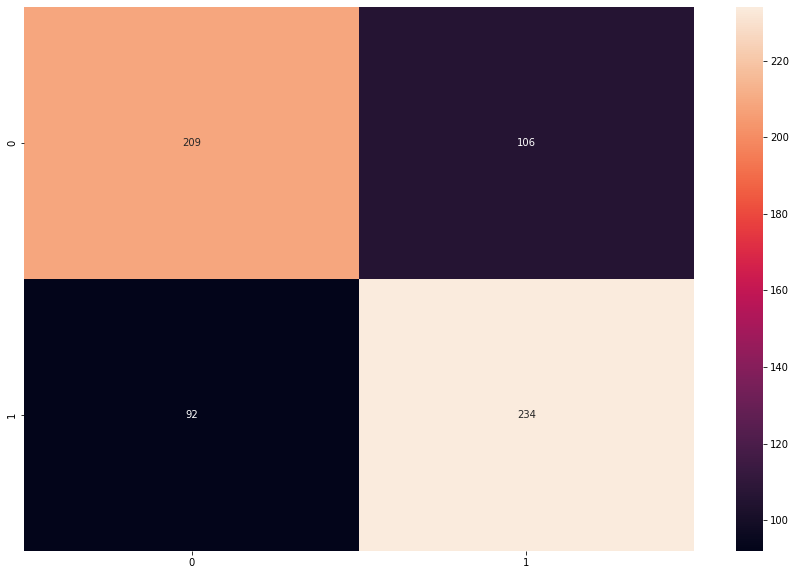

In [ ]:
analyze(lr_classifier)

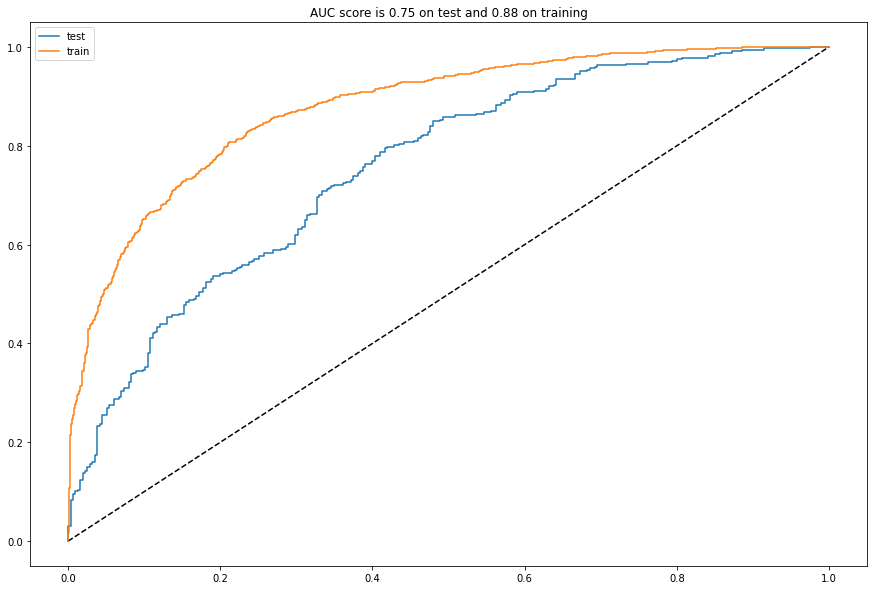

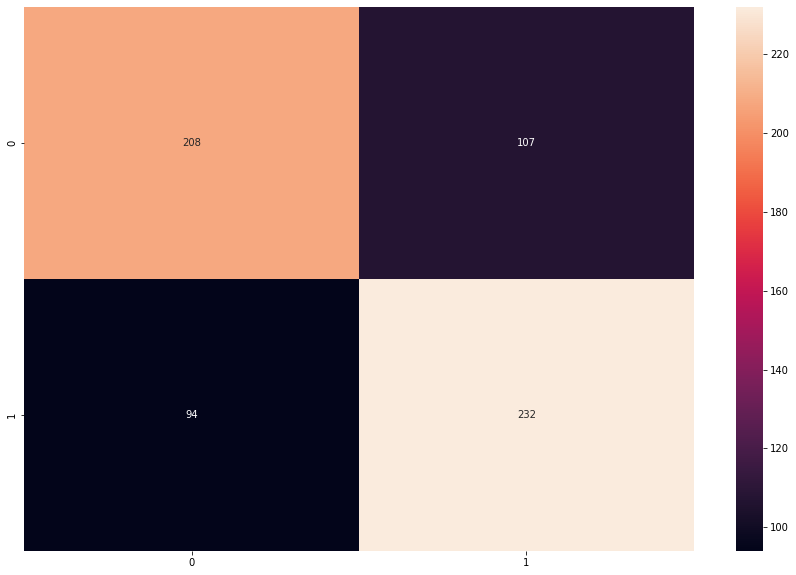

In [ ]:
analyze(rf_classifier)